* Cargar bases de datos
* Juntar bases de datos
* Eliminar niños
* Group by ent y sexo (investigar) promediando ingocup e ing_x_hrs

In [1]:
import os
import sys

import geopandas as gpd
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import esda
import pysal
import libpysal as lps
from splot import esda as esdaplot


module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

2023-03-24 15:03:31 Configured OSMnx 1.1.1
2023-03-24 15:03:31 HTTP response caching is on


## Data upload

In [21]:
enoen_1t = pd.read_csv("../../data/external/temporal_todocker/conjunto_de_datos_sdem_enoen_2022_1t.csv", encoding='latin-1')
enoen_2t = pd.read_csv("../../data/external/temporal_todocker/conjunto_de_datos_sdem_enoen_2022_2t.csv")
enoen_3t = pd.read_csv("../../data/external/temporal_todocker/conjunto_de_datos_sdem_enoen_2022_3t.csv", encoding='latin-1')
enoen_4t = pd.read_csv("../../data/external/temporal_todocker/conjunto_de_datos_sdem_enoen_2022_4t.csv", encoding='latin-1')

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (2,5,8,22,23,24,25,26,27,28) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [22]:
print(enoen_1t.shape)
enoen_1t.head()

(403652, 114)


,r_def,loc,mun,est,est_d_tri,est_d_men,ageb,t_loc_tri,t_loc_men,cd_a,...,scian,t_tra,emp_ppal,tue_ppal,trans_ppal,mh_fil2,mh_col,sec_ins,tipo,mes_cal
0,0,,2,10,122,,0,1,,1,...,6,1,2,2,0,3,2,2,1,96
1,0,,2,10,122,,0,1,,1,...,12,1,2,2,0,3,2,2,1,96
2,0,,2,10,122,,0,1,,1,...,12,1,2,2,0,3,6,4,1,96
3,0,,2,10,122,,0,1,,1,...,5,1,2,2,0,3,2,2,1,96
4,0,,10,30,124,113,0,1,1,1,...,14,1,2,2,0,3,2,2,2,1


## Data joining and treatment

In [23]:
data = [enoen_1t,enoen_2t,enoen_3t,enoen_4t]
encen_2022 = pd.concat(data)
encen_2022 = encen_2022.reset_index()

In [24]:
print(encen_2022.shape)
encen_2022.head()

(1604831, 115)


,index,r_def,loc,mun,est,est_d_tri,est_d_men,ageb,t_loc_tri,t_loc_men,...,scian,t_tra,emp_ppal,tue_ppal,trans_ppal,mh_fil2,mh_col,sec_ins,tipo,mes_cal
0,0,0,,2,10,122,,0,1,,...,6,1,2,2,0,3,2,2,1,96
1,1,0,,2,10,122,,0,1,,...,12,1,2,2,0,3,2,2,1,96
2,2,0,,2,10,122,,0,1,,...,12,1,2,2,0,3,6,4,1,96
3,3,0,,2,10,122,,0,1,,...,5,1,2,2,0,3,2,2,1,96
4,4,0,,10,30,124,113,0,1,1,...,14,1,2,2,0,3,2,2,2,1


#### Removing data for people with no income

In [25]:
#Replace all non-numeric values to NaNs
encen_2022['ingocup'] = pd.to_numeric(encen_2022['ingocup'], errors = 'coerce')

#Remove all NaNs
encen_2022 = encen_2022.dropna(subset=['ingocup'])

#Convert column type to integer
encen_2022['ingocup'] = encen_2022['ingocup'].astype('int')

#Filter data
encen_2022_f = encen_2022.loc[encen_2022['ingocup']>0]

In [26]:
print(encen_2022_f.shape)
encen_2022_f.head()

(496129, 115)


,index,r_def,loc,mun,est,est_d_tri,est_d_men,ageb,t_loc_tri,t_loc_men,...,scian,t_tra,emp_ppal,tue_ppal,trans_ppal,mh_fil2,mh_col,sec_ins,tipo,mes_cal
0,0,0,,2,10,122,,0,1,,...,6,1,2,2,0,3,2,2,1,96
16,16,0,,6,20,123,,0,1,,...,8,2,1,1,0,1,7,8,1,96
19,19,0,,6,20,123,,0,1,,...,4,1,1,1,0,1,3,8,1,96
24,24,0,,17,30,124,,0,1,,...,20,1,1,2,0,3,1,5,1,96
28,28,0,,17,30,124,,0,1,,...,5,1,2,2,0,3,2,2,1,96


#### Separar datos masc y fem

In [27]:
encen_2022_masc = encen_2022_f.loc[encen_2022_f['sex']==1]
encen_2022_fem = encen_2022_f.loc[encen_2022_f['sex']==2]

In [28]:
ing_hrs_masc = encen_2022_masc.groupby("ent").agg({"ingocup":np.average,"ing_x_hrs":np.average})
ing_hrs_fem = encen_2022_fem.groupby("ent").agg({"ingocup":np.average,"ing_x_hrs":np.average})

In [29]:
ing_hrs_masc.head()

,ingocup,ing_x_hrs
ent,,
1,8668.909965,43.601098
2,12123.042688,64.687635
3,12698.375797,72.168485
4,9602.387951,51.046579
5,10090.835993,54.215825


In [30]:
ing_hrs_fem.head()

,ingocup,ing_x_hrs
ent,,
1,6957.419028,44.537251
2,9532.641205,62.358681
3,9836.777030,70.174900
4,7167.604407,51.897335
5,8053.405873,53.319682


In [31]:
ing_hrs_masc_ri = ing_hrs_masc.reset_index()
ing_hrs_fem_ri = ing_hrs_fem.reset_index()

## Joining to geolayer

### Data

In [32]:
entidades = gpd.read_file("../../data/external/temporal_todocker/ent.gpkg")

<AxesSubplot:>

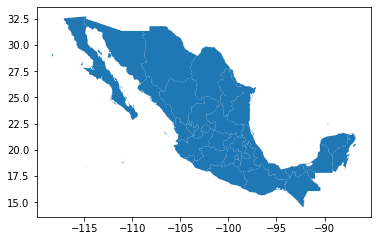

In [33]:
entidades.plot()

In [34]:
entidades = entidades.rename(columns={"CVE_EDO":"ent"})
entidades.head()

,ENTIDAD,ent,geometry
0,YUCATAN,31,"MULTIPOLYGON (((-89.88051 21.23270, -89.88215 ..."
1,VERACRUZ DE IGNACIO DE LA LLAVE,30,"MULTIPOLYGON (((-97.19892 21.03520, -97.19796 ..."
2,OAXACA,20,"MULTIPOLYGON (((-94.81572 16.34425, -94.81577 ..."
3,TAMAULIPAS,28,"MULTIPOLYGON (((-97.54580 25.04530, -97.54683 ..."
4,TABASCO,27,"MULTIPOLYGON (((-92.46848 18.65043, -92.46785 ..."


### Joining

In [35]:
# Converting ent to integer to allow merge of same kind of data type
entidades['ent'] = entidades['ent'].astype('int')
entidades.dtypes
entidades

# Merge
result = pd.merge(entidades,ing_hrs_masc_ri,on='ent')
result = result.rename(columns={"ingocup":"ingocup_masc","ing_x_hrs":"ing_x_hrs_masc"})

finalresult = pd.merge(result,ing_hrs_fem_ri,on='ent')
finalresult = finalresult.rename(columns={"ingocup":"ingocup_fem","ing_x_hrs":"ing_x_hrs_fem"})

finalresult

,ENTIDAD,ent,geometry,ingocup_masc,ing_x_hrs_masc,ingocup_fem,ing_x_hrs_fem
0,YUCATAN,31,"MULTIPOLYGON (((-89.88051 21.23270, -89.88215 ...",8735.749102,49.717852,6058.596844,49.162090
1,VERACRUZ DE IGNACIO DE LA LLAVE,30,"MULTIPOLYGON (((-97.19892 21.03520, -97.19796 ...",7974.503960,44.639934,6019.053576,44.793770
2,OAXACA,20,"MULTIPOLYGON (((-94.81572 16.34425, -94.81577 ...",7560.711719,43.314545,5601.595742,41.157232
3,TAMAULIPAS,28,"MULTIPOLYGON (((-97.54580 25.04530, -97.54683 ...",9613.786374,52.701044,7436.471531,51.437201
4,TABASCO,27,"MULTIPOLYGON (((-92.46848 18.65043, -92.46785 ...",8677.580645,46.171991,6883.946072,47.927306
5,SONORA,26,"MULTIPOLYGON (((-112.46273 29.27244, -112.4628...",10181.790783,54.836140,8042.271549,53.379563
6,SINALOA,25,"MULTIPOLYGON (((-108.00057 24.75721, -108.0014...",10693.776317,63.121073,8218.641424,59.470055
7,SAN LUIS POTOSI,24,"MULTIPOLYGON (((-100.74273 24.45964, -100.7106...",8775.230520,48.249927,7178.783595,48.480617
8,ZACATECAS,32,"MULTIPOLYGON (((-102.66476 25.06457, -102.6072...",9029.058321,50.573818,7440.295932,49.656489
9,QUINTANA ROO,23,"MULTIPOLYGON (((-86.94982 20.51055, -86.94815 ...",9578.262038,49.389794,7481.960314,48.892094


## Data analysis

In [38]:
finalresult['brecha'] = finalresult['ingocup_masc'] - finalresult['ingocup_fem']
finalresult['dif_ing_x_hrs'] = finalresult['ing_x_hrs_masc'] - finalresult['ing_x_hrs_fem']
finalresult

,ENTIDAD,ent,geometry,ingocup_masc,ing_x_hrs_masc,ingocup_fem,ing_x_hrs_fem,brecha,dif_ing_x_hrs
0,YUCATAN,31,"MULTIPOLYGON (((-89.88051 21.23270, -89.88215 ...",8735.749102,49.717852,6058.596844,49.162090,2677.152259,0.555762
1,VERACRUZ DE IGNACIO DE LA LLAVE,30,"MULTIPOLYGON (((-97.19892 21.03520, -97.19796 ...",7974.503960,44.639934,6019.053576,44.793770,1955.450384,-0.153835
2,OAXACA,20,"MULTIPOLYGON (((-94.81572 16.34425, -94.81577 ...",7560.711719,43.314545,5601.595742,41.157232,1959.115977,2.157313
3,TAMAULIPAS,28,"MULTIPOLYGON (((-97.54580 25.04530, -97.54683 ...",9613.786374,52.701044,7436.471531,51.437201,2177.314843,1.263843
4,TABASCO,27,"MULTIPOLYGON (((-92.46848 18.65043, -92.46785 ...",8677.580645,46.171991,6883.946072,47.927306,1793.634573,-1.755315
5,SONORA,26,"MULTIPOLYGON (((-112.46273 29.27244, -112.4628...",10181.790783,54.836140,8042.271549,53.379563,2139.519233,1.456577
6,SINALOA,25,"MULTIPOLYGON (((-108.00057 24.75721, -108.0014...",10693.776317,63.121073,8218.641424,59.470055,2475.134893,3.651019
7,SAN LUIS POTOSI,24,"MULTIPOLYGON (((-100.74273 24.45964, -100.7106...",8775.230520,48.249927,7178.783595,48.480617,1596.446925,-0.230689
8,ZACATECAS,32,"MULTIPOLYGON (((-102.66476 25.06457, -102.6072...",9029.058321,50.573818,7440.295932,49.656489,1588.762389,0.917329
9,QUINTANA ROO,23,"MULTIPOLYGON (((-86.94982 20.51055, -86.94815 ...",9578.262038,49.389794,7481.960314,48.892094,2096.301724,0.497701


## Save to db

In [39]:
aup.gdf_to_db_slow(finalresult,'ingreso_sex_entidad','governance',if_exists="replace")